In the previous tutorial, we created an instance of the UDP to interact with the cube ensemble. However, the whole logic of the cube reconfigurability is contained in the 'ProgrammableCubes' class (found in thr UDP file).

We can use this class to simulate and experiment with custom cube ensembles, as shown in this brief notebook!

#### As always, load some stuff first...

In [2]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import seaborn as sns
from programmable_cubes_UDP import ProgrammableCubes
import numpy as np

#### Create a small custom ensemble

In [2]:
np.random.seed(5555)

# Initial config of the ensemble (disregarding cube types)
num_cubes = 9
ensemble = np.array([[0,0,0], [0,1,0], [0,2,0], [0,0,1], [0,0,2], [1,0,0], [2,0,0],[2,1,0], [1,1,0]])
cubes = ProgrammableCubes(ensemble)

# Function for saving data for plotting
def coords_to_dense(positions):
    cube_tensor = np.zeros((10,10,10))
    for l in range(len(positions)):
        i,j,k = positions[l]
        cube_tensor[i+5][j+5][k+5] = 1
    return cube_tensor

# Store cube configs for plotting
storage = [coords_to_dense(cubes.cube_position)]

# Apply random commands directly to the cube ensemble
for j in range(200):
    # Repeat command randomly a few times
    reps = np.random.randint(3)+1
    # Select cube to be moved randomly
    cube_id = np.random.randint(num_cubes)
    # Select move randomly
    move = np.random.randint(6)
    for i in range(reps):
        # apply the command!
        # 'done' checks whether the move was legal or not
        done = cubes.apply_single_update_step(cube_id, move, step = j, verbose=True)
        if done == 1:
            # save legal moves for plotting
            storage.append(coords_to_dense(cubes.cube_position))

1 -- Cannot apply move 3 to cube 3. Cube is connecting. Skipping command...
1 -- Cannot apply move 3 to cube 3. Cube is connecting. Skipping command...
1 -- Cannot apply move 3 to cube 3. Cube is connecting. Skipping command...
3 -- Cannot apply move 0 to cube 3. Cube is connecting. Skipping command...
4 -- Cannot apply move 1 to cube 0. Cube is connecting. Skipping command...
5 -- Cannot apply move 3 to cube 3. Cube is connecting. Skipping command...
5 -- Cannot apply move 3 to cube 3. Cube is connecting. Skipping command...
6 -- Cannot apply move 1 to cube 0. Cube is connecting. Skipping command...
6 -- Cannot apply move 1 to cube 0. Cube is connecting. Skipping command...
6 -- Cannot apply move 1 to cube 0. Cube is connecting. Skipping command...
8 -- Cannot apply move 5 to cube 4. Cube is connecting. Skipping command...
8 -- Cannot apply move 5 to cube 4. Cube is connecting. Skipping command...
9 -- Cannot apply move 4 to cube 0. Cube is connecting. Skipping command...
10 -- Cannot

#### Lets have a look at the cubes pivoting in action!

<IPython.core.display.Javascript object>


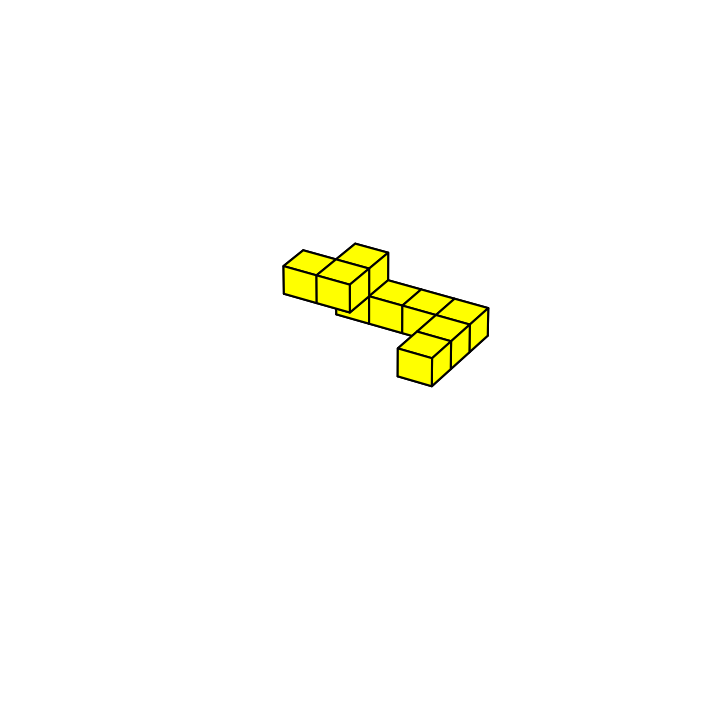

In [14]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.bbox'] = 'tight'

fig = plt.figure(figsize=(plt.figaspect(1)))
ax = fig.add_subplot(1, 1, 1, projection='3d')
sns.despine(ax=ax, bottom=True,top=True,left=True,right=True)
ln, = ax.plot3D([0], [0], [0])
ax._axis3don = False
ax.set_facecolor('white')
        
def init():
    return ln,

def update(kk):
    ax.clear()
    ax.voxels(storage[kk], facecolor = 'yellow', edgecolors = 'k', alpha=1)
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax._axis3don = False
    plt.tight_layout()

ani = FuncAnimation(fig, update, frames=np.arange(0,len(storage),1),
                    init_func=init, interval=500., blit=True)